# **Lesson 11**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

# The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

# Exercise 11.1

We start by considering the linear fit of the following funtion:
$$
f(x)=2x+1
$$

In order to make practice with NN, explore how does the linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

## Solution

For this exercise I have implemented a Neural Network of just one single neuron, which bias and weight will be optimized to fit the given linear function. The training has been executed with variable hyperparameters:
- $N_{train \ data} = [500, \ 1000, \ 2000, \ 3000]$
- $N_{epochs} = [10, \ 20, \ 50, \ 100]$
- $\sigma = [0, \ 0.25, \ 0.5, \ 1]$

Other important hyperparameters are:
- $N_{valid \ data} = 70$
- The number of layers, here $1$
- The number of neurons per layer, here $1$
- The activation function, default using 'linear'
- The loss function, here I used the Mean Square Error
- The optimizer which performs tuning of the NN parameters, here I used the Stochastic Gradient Descent
- The size of the batches in which the training dataset is divided, here I use $32$

In [3]:
# random seed
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# parameters to vary
n_train_data = [500, 1000, 2000, 3000]
n_epochs = [10, 30, 50, 100]
sigmas = [0, 0.25, 0.5, 1]

# target model parameters
m_target = 2
q_target = 1

# validation dataset
n_valid_data = 70
x_valid = np.random.uniform(-1, 1, n_valid_data)
x_valid.sort()

y_target = m_target * x_valid + q_target

In [5]:
# store data
l_data = len(n_train_data)
l_sigm = len(sigmas)
l_epoc = len(n_epochs)

train_loss_1 = np.zeros((l_data, l_sigm, l_epoc, max(n_epochs)))
valid_loss_1 = np.zeros((l_data, l_sigm, l_epoc, max(n_epochs)))
m_model = np.zeros((l_data, l_sigm, l_epoc))
q_model = np.zeros((l_data, l_sigm, l_epoc))

In [6]:
def training_nn(x_train, y_train, x_valid, y_valid, n_epochs) :
    # initialize the neural network
    NN = tf.keras.Sequential()
    NN.add(Dense(1, input_shape=(1,)))
    NN.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    NN.summary()
    
    # fit the model
    story = NN.fit(x=x_train, y=y_train, batch_size=32, epochs=n_epochs, shuffle=True, validation_data=(x_valid, y_valid))

    m_model = NN.get_weights()[0][0][0]
    q_model = NN.get_weights()[1][0]
    train_loss = np.array(story.history['loss'])
    valid_loss = np.array(story.history['val_loss'])

    return m_model, q_model, train_loss, valid_loss


In [7]:
# loop over the parameters and train the model
for d, dat in enumerate(n_train_data) : 
    x_train = np.random.uniform(-1, 1, dat)
    for s, sigma in enumerate(sigmas) :
        y_train = np.random.normal(m_target * x_train + q_target, sigma)
        y_valid = np.random.normal(m_target * x_valid + q_target, sigma)
        for e, epo in enumerate(n_epochs) :
            output = training_nn(x_train, y_train, x_valid, y_valid, epo)
            m_model[d,s,e] = output[0]
            q_model[d,s,e] = output[1]
            train_loss_1[d,s,e,:epo] = output[2]
            valid_loss_1[d,s,e,:epo] = output[3]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 0s 8ms/step - loss: 0.9363 - mse: 0.9363 - val_loss: 0.6603 - val_mse: 0.6603
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5415 - mse: 0.5415 - val_loss: 0.3840 - val_mse: 0.3840
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3227 - mse: 0.3227 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2009 - mse: 0.2009 - val_loss: 0.1481 - val_mse: 0.1481
Epoch 5/10
16/16 [================

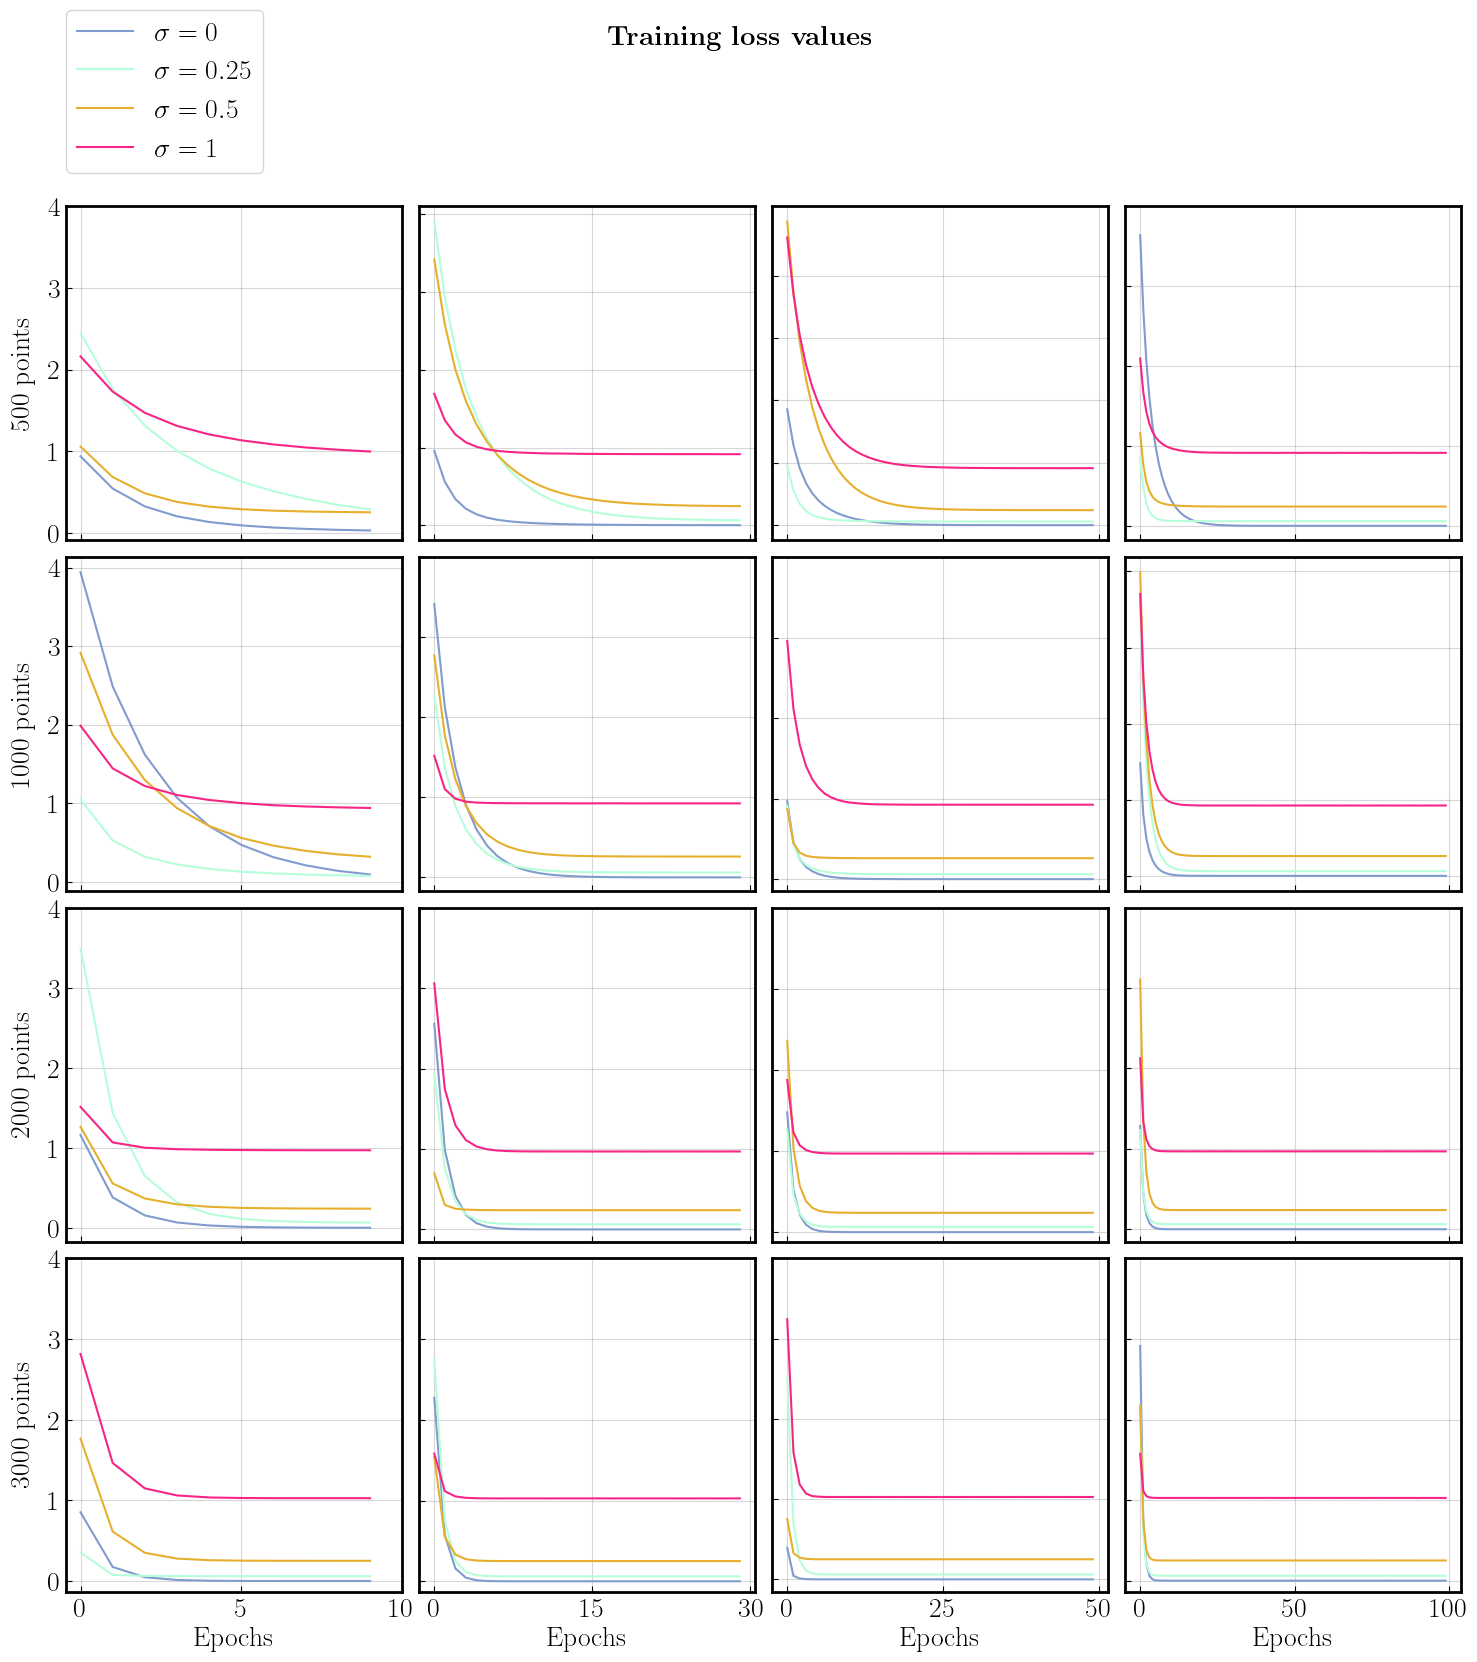

In [37]:
# plot the train losses
fig, axs = plt.subplots(4, 4, figsize=(18, 18), gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
plt.suptitle(r'\textbf{Training loss values}')
colors = ['#809BCE', '#B5FED9', '#E6AF2E', '#F72585']

for d, dat in enumerate(n_train_data) : 
    for e, epo in enumerate(n_epochs) :
        x = np.linspace(1, epo, epo)
        for s, sigma in enumerate(sigmas) :
            axs[d,e].plot(train_loss_1[d,s,e,:epo], c=colors[s], label='$\sigma = ' + str(sigma) + '$')

        axs[d,0].set_xticks([0,5,10], [])
        axs[d,1].set_xticks([0,15,30], [])
        axs[d,2].set_xticks([0,25,50], [])
        axs[d,3].set_xticks([0,50,100], [])
        axs[d,e].set_yticks([0,1,2,3,4], [])
        axs[d,0].set_yticks([0,1,2,3,4], ['0', '1', '2', '3', '4'])
        axs[-1,e].set_xlabel('Epochs')
    axs[d,0].set_ylabel(str(dat) + ' points', labelpad=10)
            
axs[0,0].legend(loc=(0,1.1))
axs[-1,0].set_xticks([0,5,10], ['0','5','10'])
axs[-1,1].set_xticks([0,15,30], ['0','15','30'])
axs[-1,2].set_xticks([0,25,50], ['0','25','50'])
axs[-1,3].set_xticks([0,50,100], ['0','50','100'])


plt.show()

Here I plotted the values of the training losses for different hyperparameters combinations: as we can expect, best results (i.e. lower loss values) are obtained increasing the number of data points or epochs, or for lower values of the noise $\sigma$. At a fixed number of data points, the value of $\sigma$ makes difficult for the NN to improve its accuracy also increasing the epochs number. Also, when we have many data points it is not necessary to train the model for many epochs, in fact the loss converges rapidly to its minimum value.

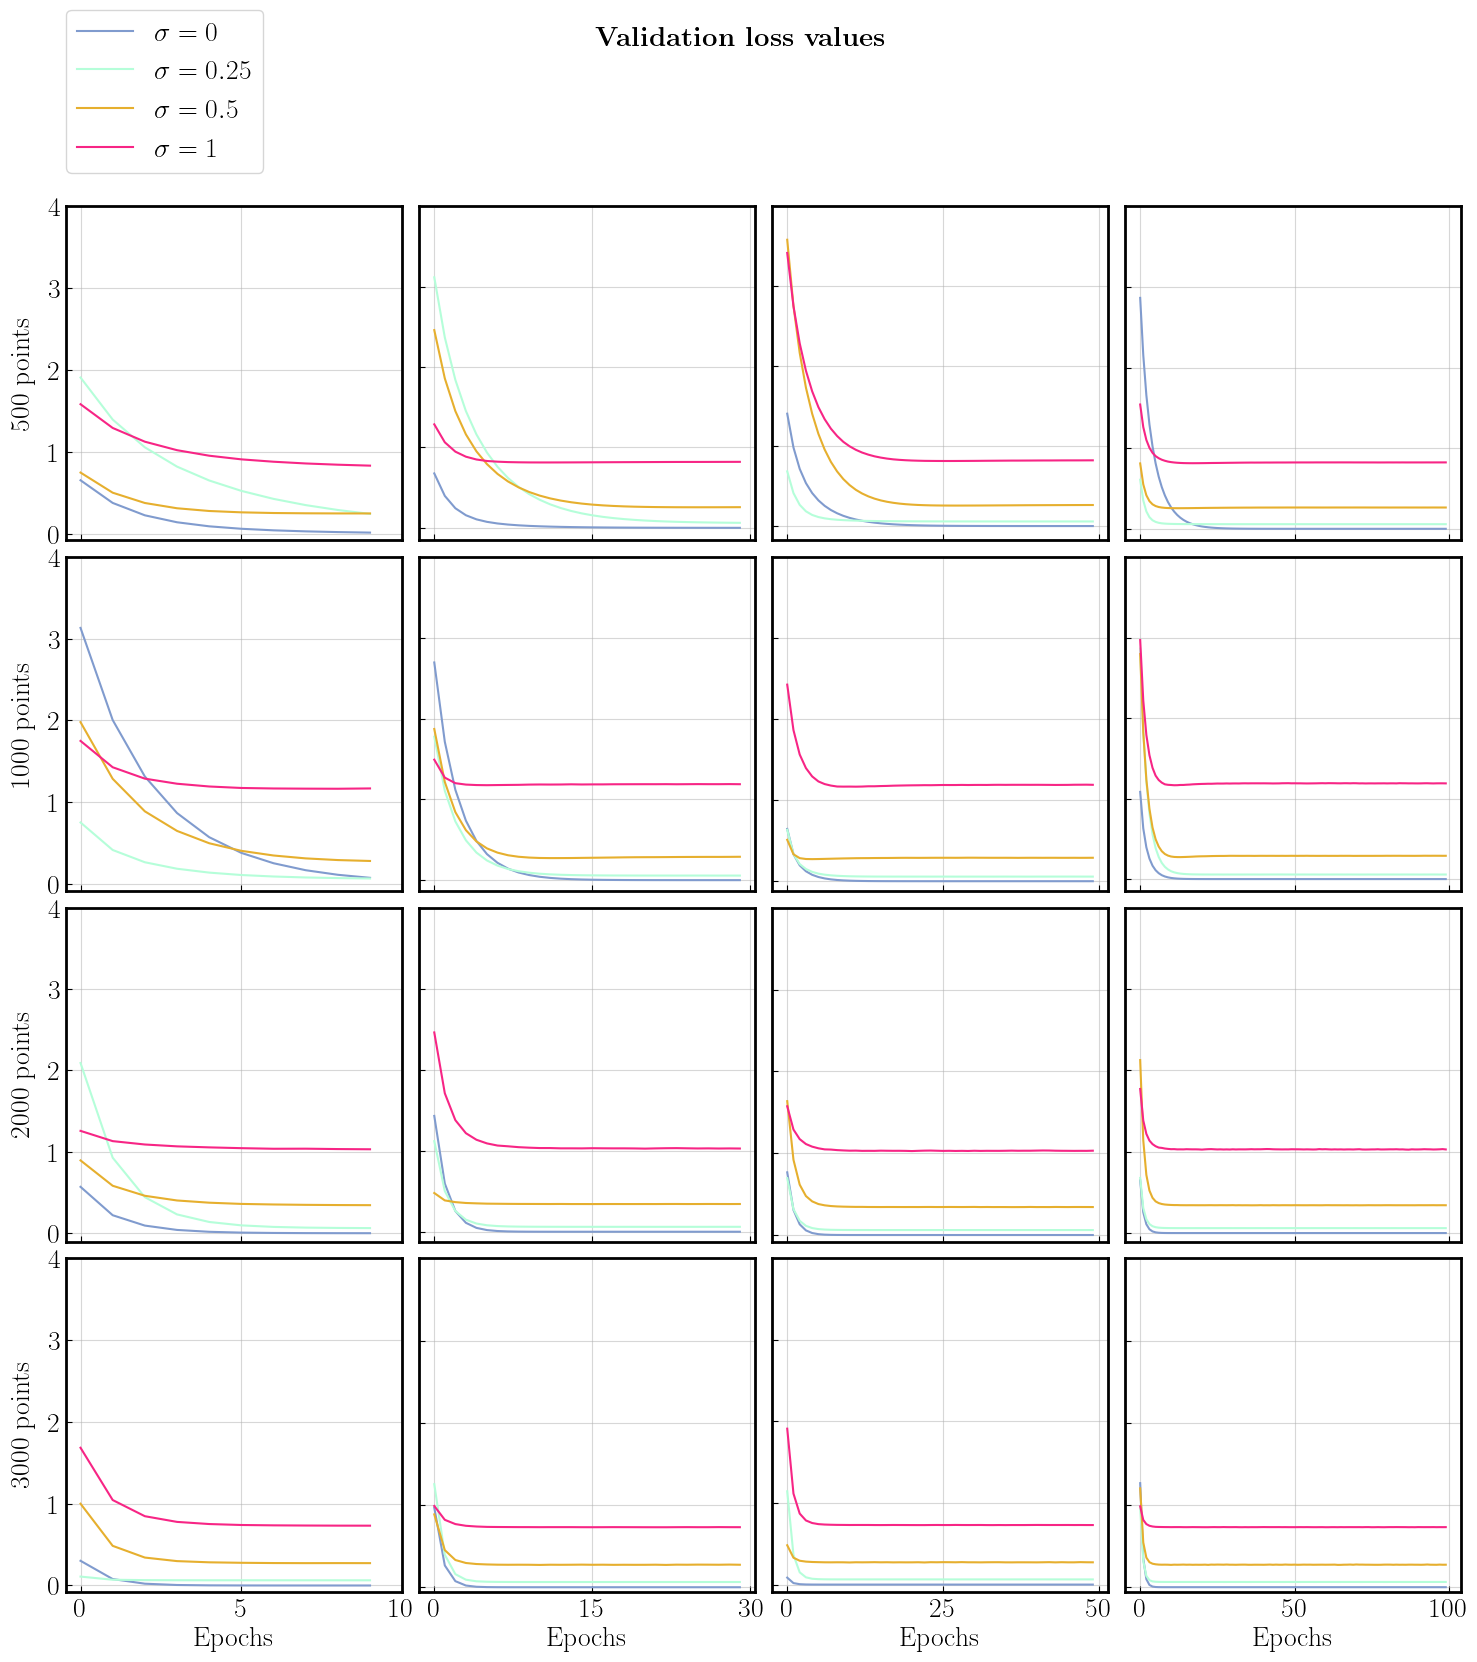

In [38]:
# plot the validation losses
fig, axs = plt.subplots(4, 4, figsize=(18, 18), gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
plt.suptitle(r'\textbf{Validation loss values}')
colors = ['#809BCE', '#B5FED9', '#E6AF2E', '#F72585']

for d, dat in enumerate(n_train_data) : 
    for e, epo in enumerate(n_epochs) :
        x = np.linspace(1, epo, epo)
        for s, sigma in enumerate(sigmas) :
            axs[d,e].plot(valid_loss_1[d,s,e,:epo], c=colors[s], label='$\sigma = ' + str(sigma) + '$')
        
        axs[d,0].set_xticks([0,5,10], [])
        axs[d,1].set_xticks([0,15,30], [])
        axs[d,2].set_xticks([0,25,50], [])
        axs[d,3].set_xticks([0,50,100], [])
        axs[d,e].set_yticks([0,1,2,3,4], [])
        axs[d,0].set_yticks([0,1,2,3,4], ['0', '1', '2', '3', '4'])
        axs[-1,e].set_xlabel('Epochs')
    axs[d,0].set_ylabel(str(dat) + ' points', labelpad=10)
            
axs[0,0].legend(loc=(0,1.1))
axs[-1,0].set_xticks([0,5,10], ['0','5','10'])
axs[-1,1].set_xticks([0,15,30], ['0','15','30'])
axs[-1,2].set_xticks([0,25,50], ['0','25','50'])
axs[-1,3].set_xticks([0,50,100], ['0','50','100'])


plt.show()

In these plots I show the value of the validation loss for various combinations of the hyperparameters, in general the validation loss is a little bit higher than the training loss.

In [10]:
losses = [train_loss_1, valid_loss_1]

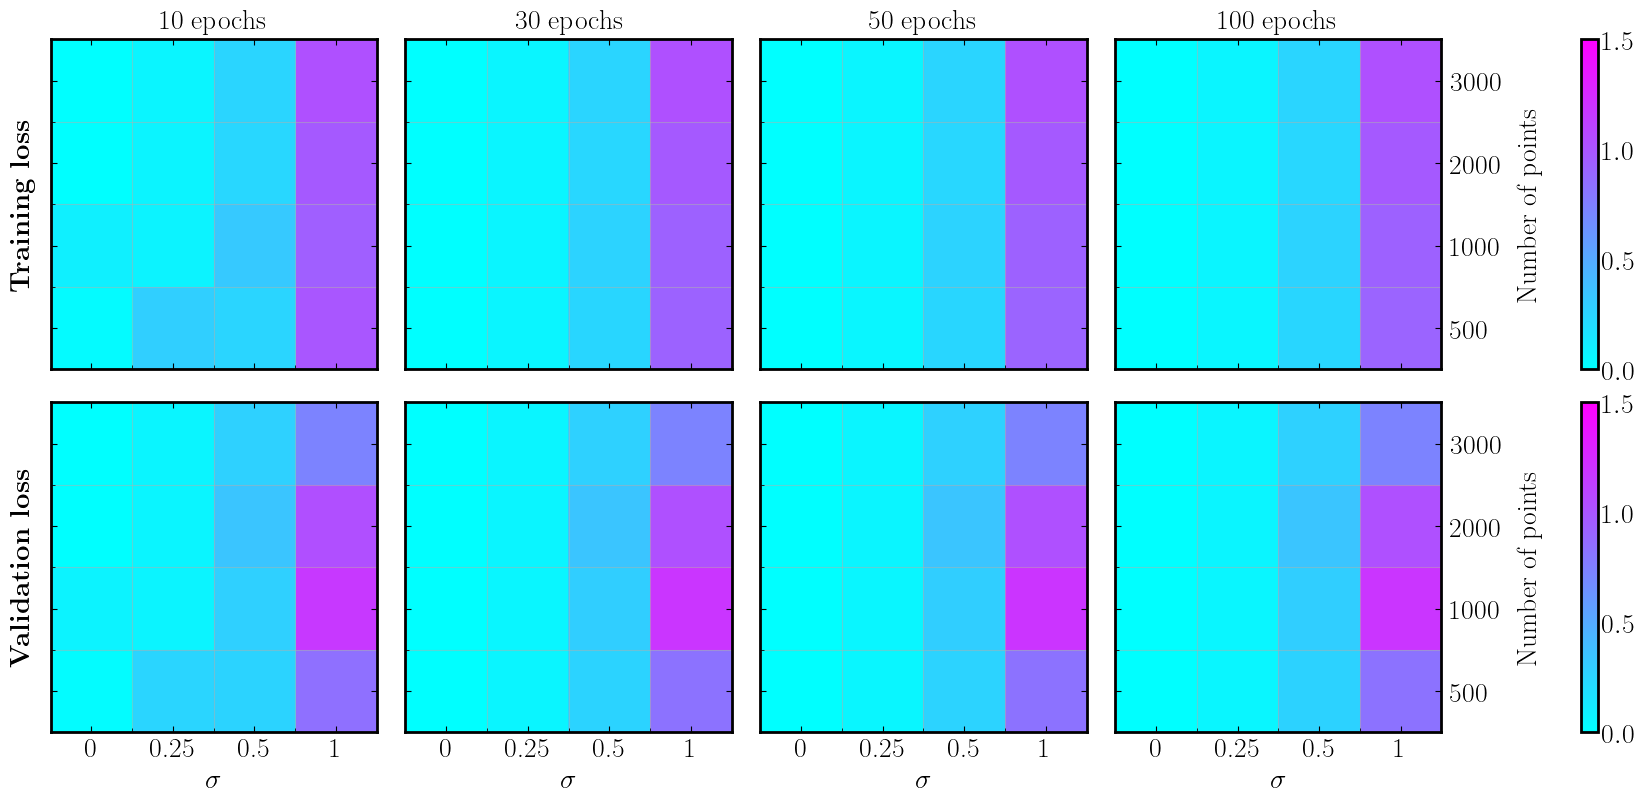

In [11]:
fig, axs = plt.subplots(2, 5, figsize=(20,9), gridspec_kw={'hspace': 0.1, 'wspace': 0.1, 'width_ratios': [1, 1, 1, 1, 0.4]})

for i in range(2) :
    for e, epo in enumerate(n_epochs) :
        map = axs[i,e].imshow(losses[i][:,:,e,epo-1], origin='lower', cmap='cool', aspect='auto')
        map.set_clim(0,1.5)

        axs[1,e].set_xlabel('$\sigma$')
        axs[0,e].set_title(str(epo) + ' epochs', pad=8)
        axs[0,e].set_xticks([0,1,2,3], [])
        axs[1,e].set_xticks([0,1,2,3], sigmas)
        axs[i,e].set_yticklabels([])
        axs[i,e].yaxis.set_tick_params(right=True)
        axs[i,e].xaxis.set_tick_params(top=True)
        axs[i,e].minorticks_on()
        axs[i,e].set_xticks([0.5,1.5,2.5], minor=True)
        axs[i,e].set_yticks([0.5,1.5,2.5], minor=True)
        axs[i,e].grid(False, which='major')
        axs[i,e].grid(True, which='minor')
        axs[i,e].set_yticks([0,1,2,3], [])
    axs[i,3].set_yticks([0,1,2,3], n_train_data)
    axs[i,3].yaxis.set_tick_params(pad=6, labelleft=False, labelright=True)
    axs[i,3].set_ylabel('Number of points', labelpad=12)
    axs[i,3].yaxis.set_label_position('right')
    axs[i,4].axis('off')
    cbar = fig.colorbar(map, ax=axs[i,-1], location='right')

axs[0,0].set_ylabel(r'\textbf{Training loss}', labelpad=8)
axs[1,0].set_ylabel(r'\textbf{Validation loss}', labelpad=8)


plt.show()

These heatmaps show a summary for the training and validation losses with all the combination of the parameters. The color map labels the value of the loss at the end of the training, and in both cases I used the same color scale, to give evidence of the general better behaviour of the training loss.

We can see that the value of $\sigma$ is very relevant in the accuracy of the model, and that in general when we have a large traning dataset the NN reaches quickly the losso minimum. We note also that the dependance of the validation loss value from the training dataset dimension is not linear, in fact this plots show that, with high $\sigma$, the model with $500$ data points have a lower loss that the one with $1000$ data points.

# Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Solution

To solve this exercise I simply extend the code written for exercise $11.1$, below I reported all the hyperparameters.

Variable:
- Activation function: $[$'relu', 'elu', 'tanh'$]$
- $N_{hidden \ layers} = [1, \ 2]$
- $N_{neurons} = [32, \ 64, \ 128]$

Fixed:
- $N_{train \ data} = 1000$
- $N_{valid \ data} = 100$
- $N_{epochs} = 100$
- $\sigma = 0.4$
- Batch size $= 32$
- Loss function: Mean Square Error
- Optimizer: Adam

I chose the number of neurons per layer as a multiple of $16$ because in this way the calculations are a bit more efficient due to the hardware structure of the computer.

In [103]:
# target function
def poly3(x, a = 3, b = -2, c = -3, d = 4) :
    return a*(x**3) + b*(x**2) + c*x + d

# sigma and epochs
sigma = 0.4
epochs = 100

# training dataset
n_train = 1000
x_train = np.random.uniform(-1,1,n_train)
y_train = np.random.normal(poly3(x_train), sigma)

# validation dataset
n_valid = 100
x_valid = np.random.uniform(-1,1,n_valid)
x_valid.sort()
y_valid = np.random.normal(poly3(x_valid), sigma)

# dataset for a prediction
n_pred = 100
x_pred = np.random.uniform(-2,2,n_pred)
x_pred.sort()

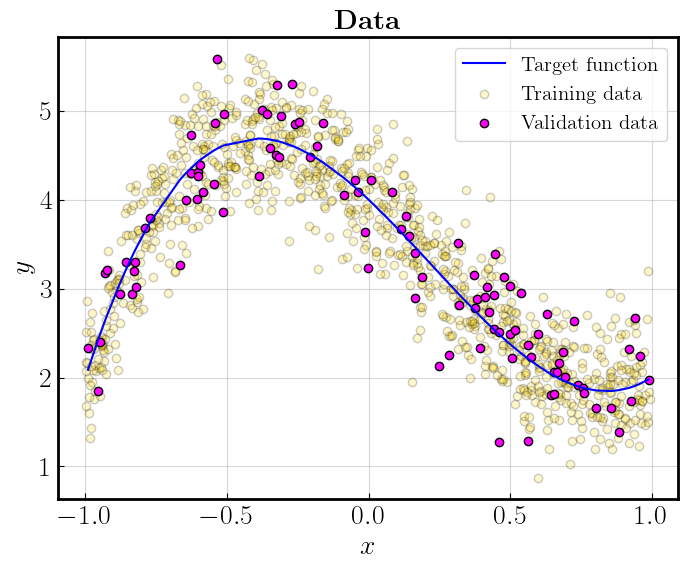

In [104]:
plt.plot(x_valid, poly3(x_valid), c='b', label='Target function')
plt.scatter(x_train, y_train, c='gold', alpha=0.2, label='Training data')
plt.scatter(x_valid, y_valid, c='magenta', label='Validation data')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'\textbf{Data}')
plt.legend(fontsize=15)

plt.show()

In this plot I showed the target function and the generated training and validation datasets, with a gaussian noise $\sigma \sim \mathcal N(0,0.4)$.

In [105]:
# hyperparameters of the neural network: activation function, number of hidden layers, number of nodes per layer
activ = ['relu', 'elu', 'tanh']
layers = [1, 2]
neurons = [32, 64, 128]

l_act = len(activ)
l_lay = len(layers)
l_neu = len(neurons)

In [106]:
train_loss_2 = np.zeros((l_act, l_lay, l_neu, epochs))
valid_loss_2 = np.zeros((l_act, l_lay, l_neu, epochs))
prediction_2 = np.zeros((l_act, l_lay, l_neu, n_pred))

Below I define the NN structure, note that the input layer has input shape $=1$ since the data are a one dimensional numpy array, and the output layer contains only one neuron because the function we want to fit gives a scalar value.

In [107]:
def training_hyparams(activ, layers, neurons) :
    # initialize the neural network
    NN = tf.keras.Sequential()
    for l in range(layers) :
        if(l == 0) :
            NN.add(Dense(neurons, input_shape=(1,), activation=activ))
        else :
            NN.add(Dense(neurons, activation=activ))
    NN.add(Dense(1, activation=activ))
    NN.compile(optimizer='adam', loss='mse', metrics=['mse'])
    NN.summary()
    
    # fit the model
    story = NN.fit(x=x_train, y=y_train, batch_size=32, epochs=epochs, shuffle=True, validation_data=(x_valid, y_valid))

    y_pred = np.array(NN.predict(x_pred))[:,0]
    train_loss = np.array(story.history['loss'])
    valid_loss = np.array(story.history['val_loss'])

    return y_pred, train_loss, valid_loss

In [108]:
# cycle over the hyperparameters
for a, act in enumerate(activ) :
    for l, lay in enumerate(layers) :
        for n, neu in enumerate(neurons) :
            prediction_2[a,l,n], train_loss_2[a,l,n], valid_loss_2[a,l,n] = training_hyparams(act, lay, neu)

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 32)                64        
                                                                 
 dense_136 (Dense)           (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 11.3983 - mse: 11.3983 - val_loss: 10.1179 - val_mse: 10.1179
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 10.0095 - mse: 10.0095 - val_loss: 8.7153 - val_mse: 8.7153
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 8.5292 - mse: 8.5292 - val_loss: 7.2389 - val_mse: 7.2389
Epoch 4/100
32

In [109]:
losses = [train_loss_2, valid_loss_2]

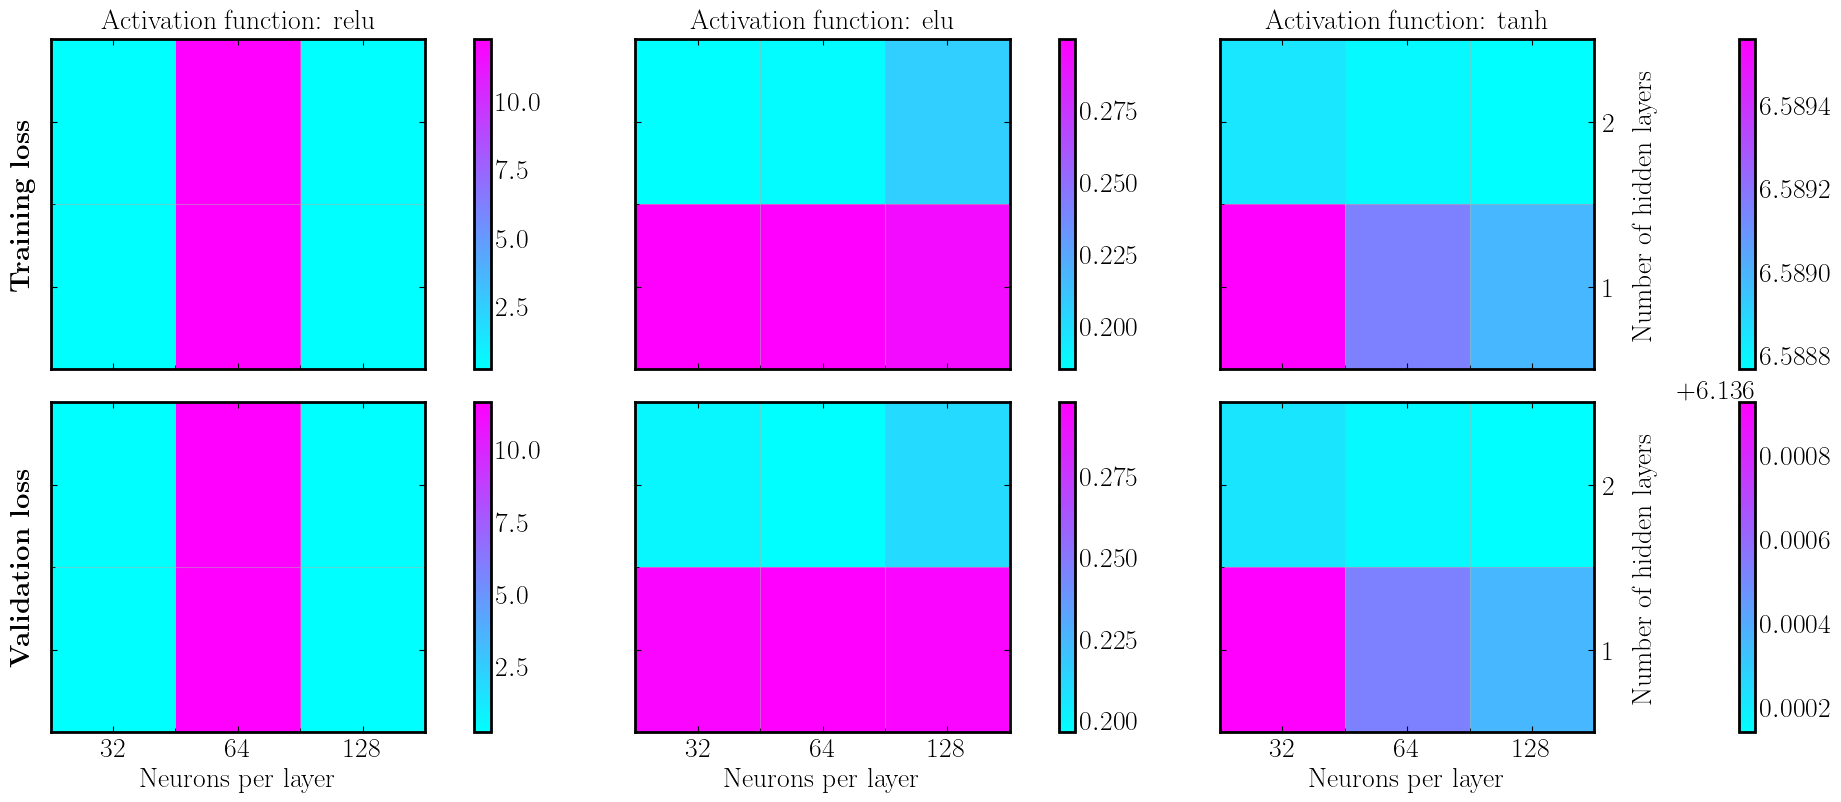

In [110]:
fig, axs = plt.subplots(2, l_act+3, figsize=(22,9), gridspec_kw={'hspace': 0.1, 'wspace': 0.2, 'width_ratios': [1, 0.3, 1, 0.3, 1, 0.3]})

for i in range(2) :
    map0 = axs[i,0].imshow(losses[i][0,:,:,-1], origin='lower', cmap='cool', aspect='auto')
    map2 = axs[i,2].imshow(losses[i][1,:,:,-1], origin='lower', cmap='cool', aspect='auto')
    map4 = axs[i,4].imshow(losses[i][2,:,:,-1], origin='lower', cmap='cool', aspect='auto')
    #map0.set_clim(0,12)
    #map2.set_clim(0.17,0.25)
    #map4.set_clim(6.33282,6.65994)
    for a, act in enumerate(activ) :

        axs[0,2*a].set_title('Activation function: ' + act, pad=8)
        axs[1,2*a].set_xlabel('Neurons per layer')
        axs[0,2*a].set_xticks([0,1,2], [])
        axs[1,2*a].set_xticks([0,1,2], neurons)
        axs[i,2*a].set_yticklabels([])
        axs[i,2*a].yaxis.set_tick_params(right=True)
        axs[i,2*a].xaxis.set_tick_params(top=True)
        axs[i,2*a].minorticks_on()
        axs[i,2*a].set_xticks([0.5,1.5], minor=True)
        axs[i,2*a].set_yticks([0.5,1.5], minor=True)
        axs[i,2*a].grid(True, which='minor')
        axs[i,2*a].grid(False, which='major')
        axs[i,2*a].set_yticks([0,1], [])

    axs[i,4].set_yticks([0,1], layers)
    axs[i,4].yaxis.set_tick_params(pad=6, labelleft=False, labelright=True)
    axs[i,4].set_ylabel('Number of hidden layers', labelpad=12)
    axs[i,4].yaxis.set_label_position('right')

    axs[i,1].axis('off')
    axs[i,3].axis('off')
    axs[i,5].axis('off')
    cbar1 = fig.colorbar(map0, ax=axs[i,1], location='left')
    cbar3 = fig.colorbar(map2, ax=axs[i,3], location='left')
    cbar5 = fig.colorbar(map4, ax=axs[i,5], location='right')
    cbar1.ax.yaxis.set_ticks_position('right')
    cbar3.ax.yaxis.set_ticks_position('right')
    cbar5.ax.yaxis.set_ticks_position('right')

axs[0,0].set_ylabel(r'\textbf{Training loss}', labelpad=8)
axs[1,0].set_ylabel(r'\textbf{Validation loss}', labelpad=8)


plt.show()

These heatmaps summarize the value of training and validation losses at the end of the training. In general the value are really different one from each other, and I couldn't find a common scale. The activation function has a huge impact on the value of the loss, the one that seems to lead to the best result is the 'elu', that performs well with two hidden layers and bad with one. Also the 'relu' gives a good result, having a low value for the loss correspondingly to $32$ and $128$ neurons per layer, both with one and two layers.

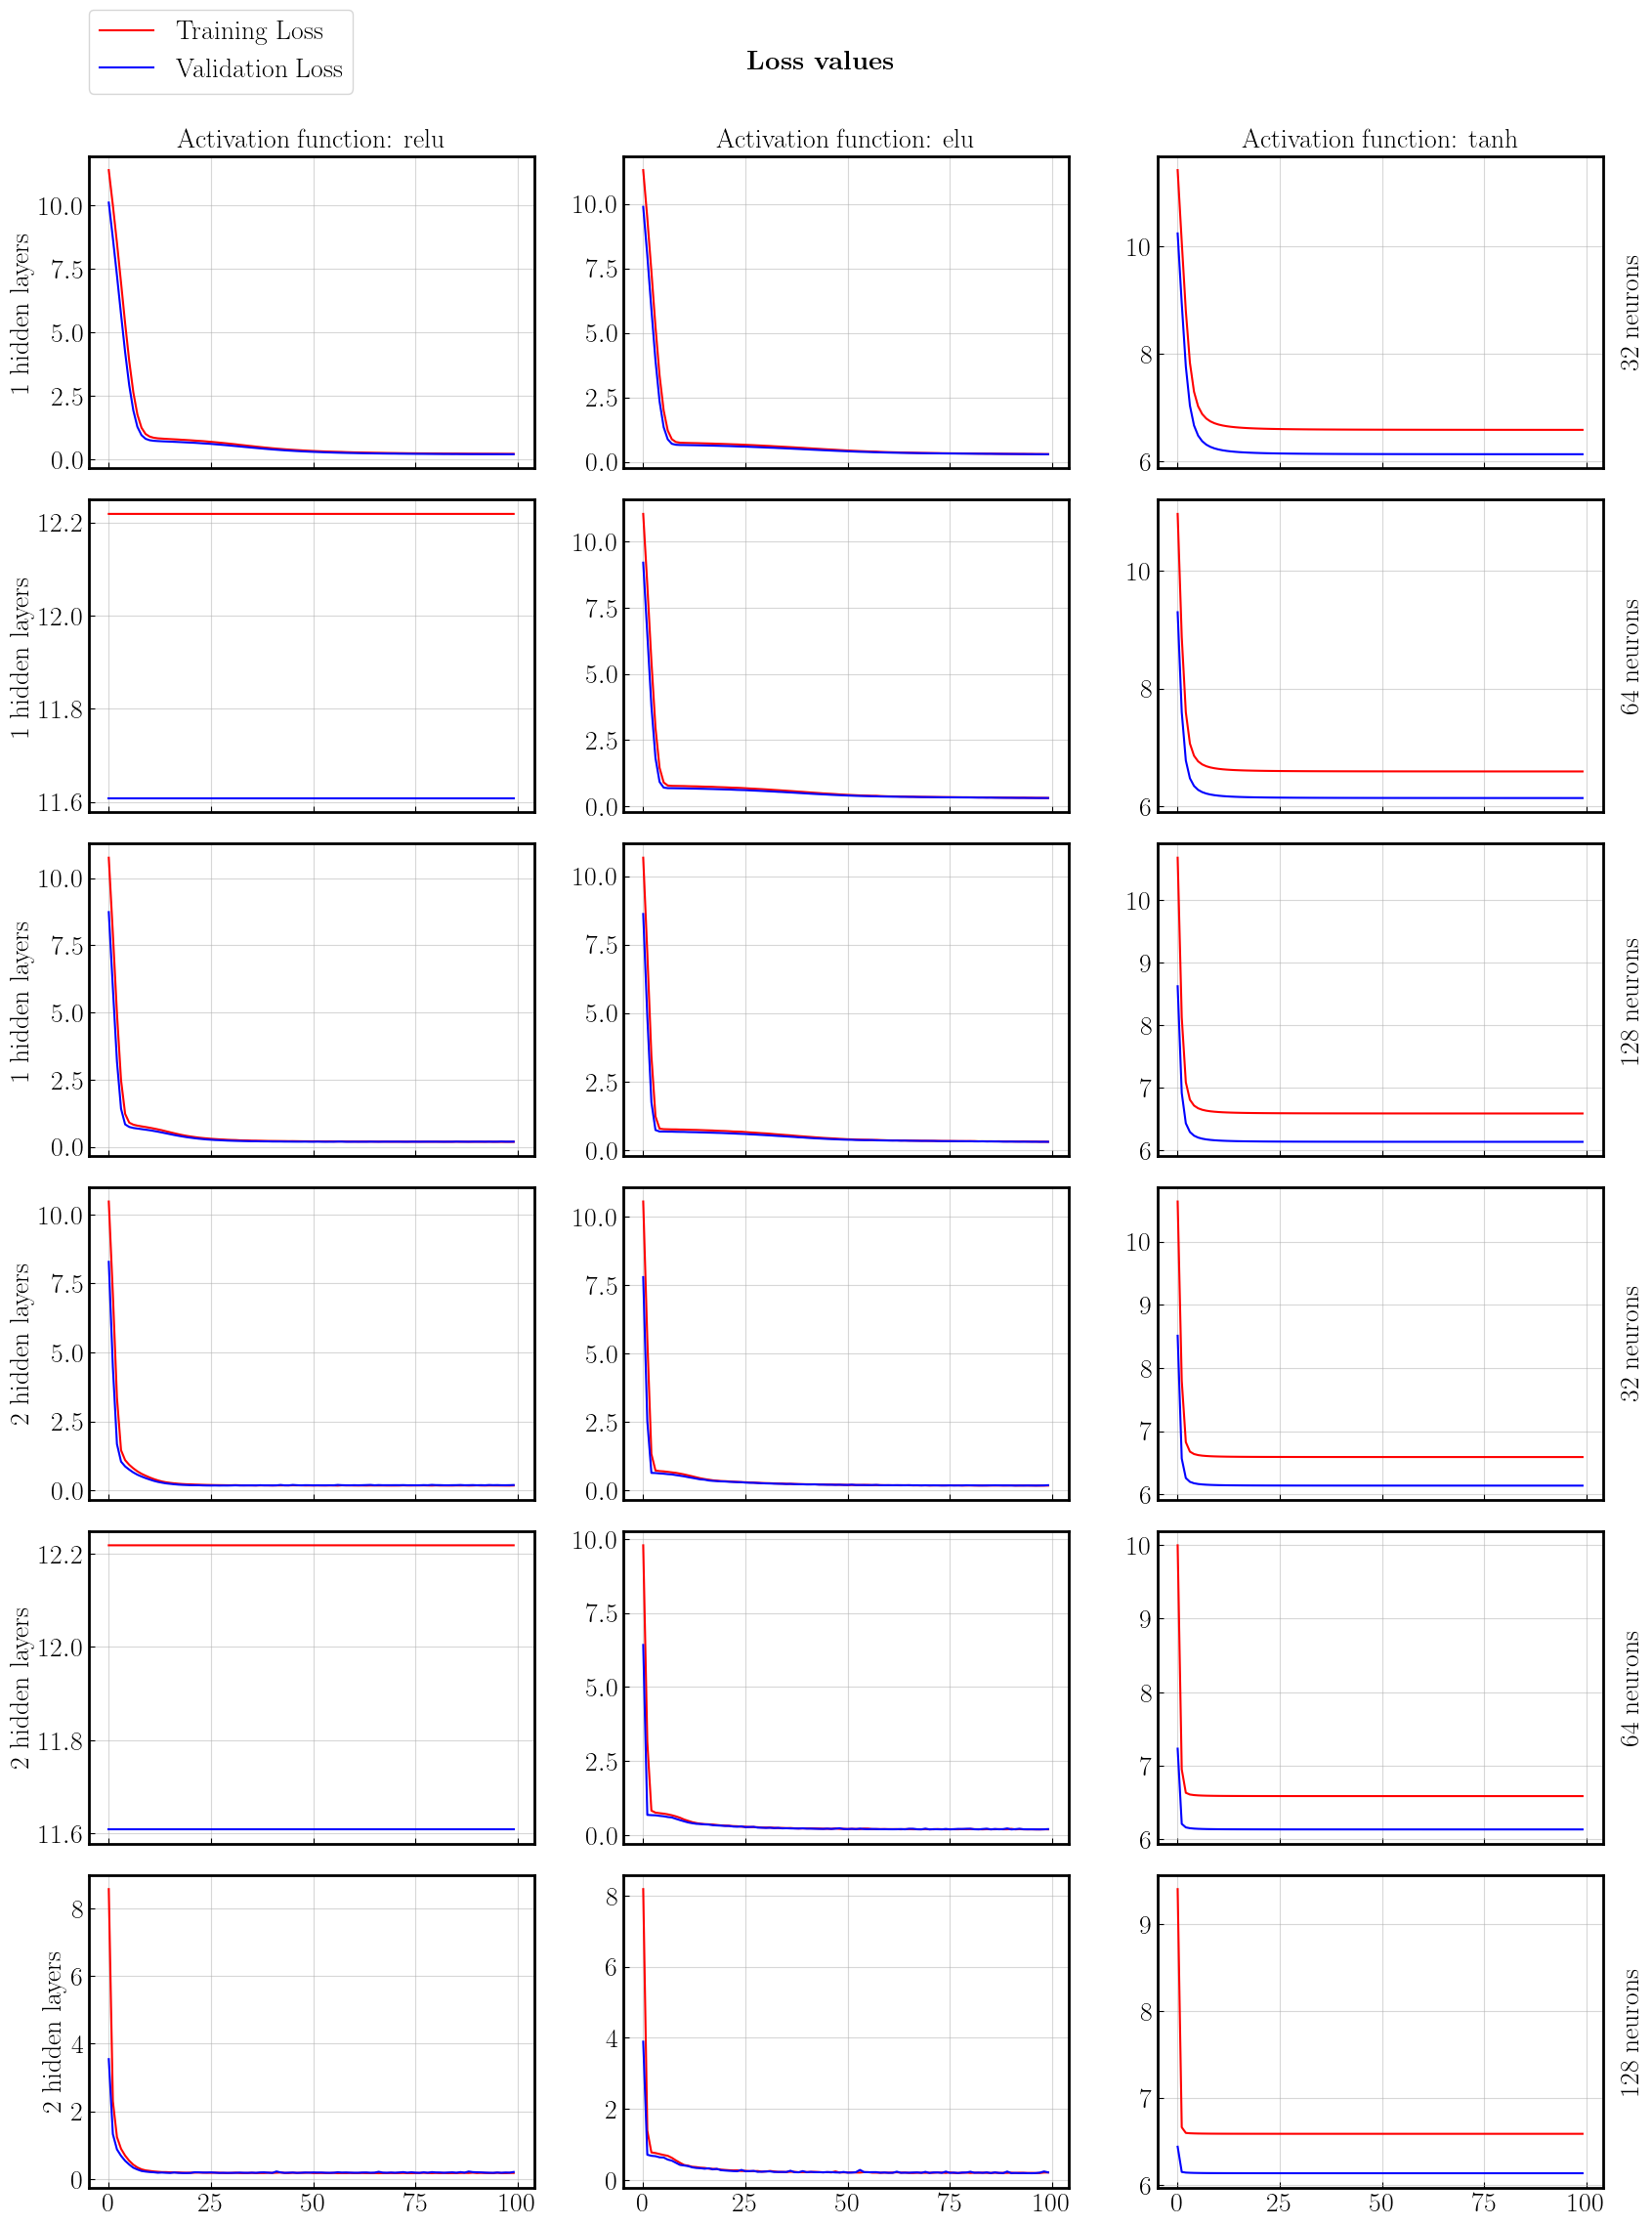

In [111]:
# all losses visualization
fig, axs = plt.subplots(l_lay*l_neu, l_act, figsize=(20,27), gridspec_kw={'hspace': 0.1})
plt.suptitle(r'\textbf{Loss values}', y=0.92)

for a, act in enumerate(activ) :
    for l, lay in enumerate(layers) :
        for n, neu in enumerate(neurons) :
            axs[l*l_neu+n,a].plot(train_loss_2[a,l,n], c='r', label='Training Loss')
            axs[l*l_neu+n,a].plot(valid_loss_2[a,l,n], c='b', label='Validation Loss')

            if(l*l_neu+n != l_lay*l_neu-1) :
                axs[l*l_neu+n,a].set_xticklabels([])
            axs[l*l_neu+n,0].set_ylabel(str(lay) + ' hidden layers')
            axs[l*l_neu+n,2].yaxis.set_label_position('right')
            axs[l*l_neu+n,2].set_ylabel(str(neu) + ' neurons', labelpad=12)
    axs[0,a].set_title('Activation function: ' + act)

axs[0,0].legend(loc=(0,1.2))

plt.show()

In this plots I compared the training and validation losses for all the combination of the hyperparameters. We can see that the 'relu' activation function performs a good training, though in two cases its loss values remain stuck around $11$ and $12$. 

In the 'elu' case the loss gts always towards zero, getting better results with $2$ layers of $128$ neurons. 

The 'tanh' train losses decrease very quickly, but they then remain constant at a value between $6$ and $7$. The validation losses however are a little lower, but they remains around the value of $6$.

So we can deduce that the main hyperparameter that impact on the result of the fit is the activation function, and the one we should use is the 'elu' or the 'relu'. As for the other parameters, the number of layers and the number of neurons per layer, we can say that in general the more the model complexity grows the better the result is.

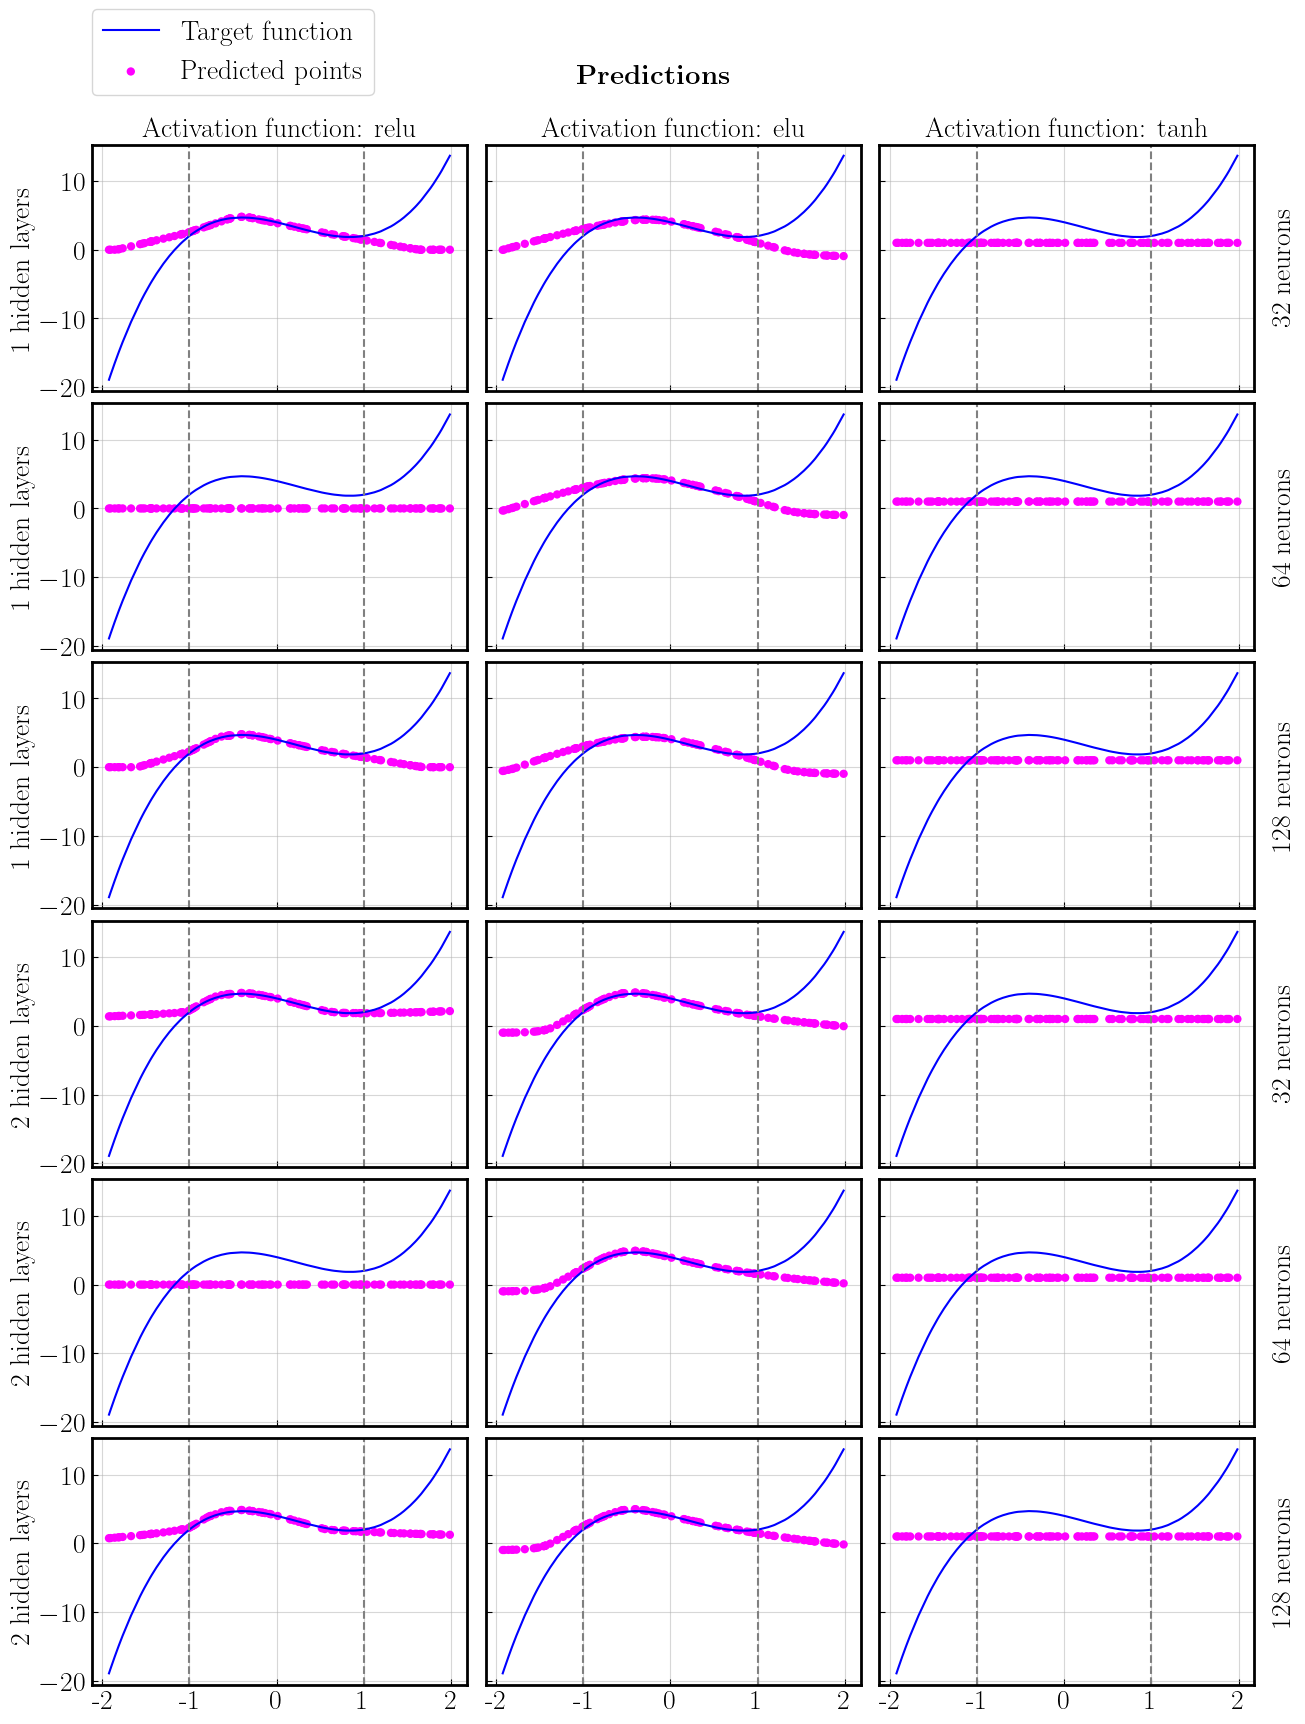

In [112]:
# predicted values
fig, axs = plt.subplots(l_lay*l_neu, l_act, figsize=(15,20), gridspec_kw={'hspace': 0.05, 'wspace': 0.05})
plt.suptitle(r'\textbf{Predictions}', y=0.92)

for a, act in enumerate(activ) :
    for l, lay in enumerate(layers) :
        for n, neu in enumerate(neurons) :
            axs[l*l_neu+n,a].plot(x_pred, poly3(x_pred), c='b', label='Target function')
            axs[l*l_neu+n,a].scatter(x_pred, prediction_2[a,l,n], c='magenta', edgecolor='None', label='Predicted points')
            axs[l*l_neu+n,a].axvline(-1, c='gray', ls='--')
            axs[l*l_neu+n,a].axvline(1, c='gray', ls='--')

            axs[l*l_neu+n,a].set_xticklabels([])
            axs[-1,a].set_xticks([-2,-1,0,1,2], ['-2','-1','0','1',2])
            if(a != 0) :
                axs[l*l_neu+n,a].set_yticklabels([])
            axs[l*l_neu+n,0].set_ylabel(str(lay) + ' hidden layers')
            axs[l*l_neu+n,2].yaxis.set_label_position('right')
            axs[l*l_neu+n,2].set_ylabel(str(neu) + ' neurons', labelpad=12)
    axs[0,a].set_title('Activation function: ' + act)

axs[0,0].legend(loc=(0,1.2))

plt.show()

The predictions plot confirms our previous observation: in the 'relu' and 'elu' case the fit learns how to reproduce the function in the training interval, while the 'tanh' fails even there. Fitting values outside the training interval, however, is difficult even for the 'elu' and the 'relu', but we can see a little improvement as the model complexity grows.

# Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

## Solution

To fit this $2D$ function I extended the previous NN, modifying the input shape to $2$. These are the hyperparameters that I chose:
- $N_{train \ data} = 10000$
- $N_{valid \ data} = 1000$
- $N_{hidden \ layers} = 1$
- $N_{neurons} = 64$
- $N_{epochs} = 100$
- $\sigma = 0.4$
- Activation function: 'elu'
- Batch size $= 32$
- Loss function: Mean Square Error
- Optimizer: Adam

In [22]:
# target function
def sin2D(x, y) :
    return np.sin(x**2 + y**2)

# training dataset
n_train = 10000
x_train = np.random.uniform(-1.5, 1.5, n_train)
y_train = np.random.uniform(-1.5, 1.5, n_train)
data_train = np.column_stack((x_train, y_train))
z_train = np.random.normal(sin2D(x_train, y_train), sigma)

sigma = 0.4

# validation dataset
n_valid = 1000
x_valid = np.random.uniform(-1.5, 1.5, n_valid)
y_valid = np.random.uniform(-1.5, 1.5, n_valid)
data_valid = np.column_stack((x_valid, y_valid))
z_valid = np.random.normal(sin2D(x_valid, y_valid), sigma)

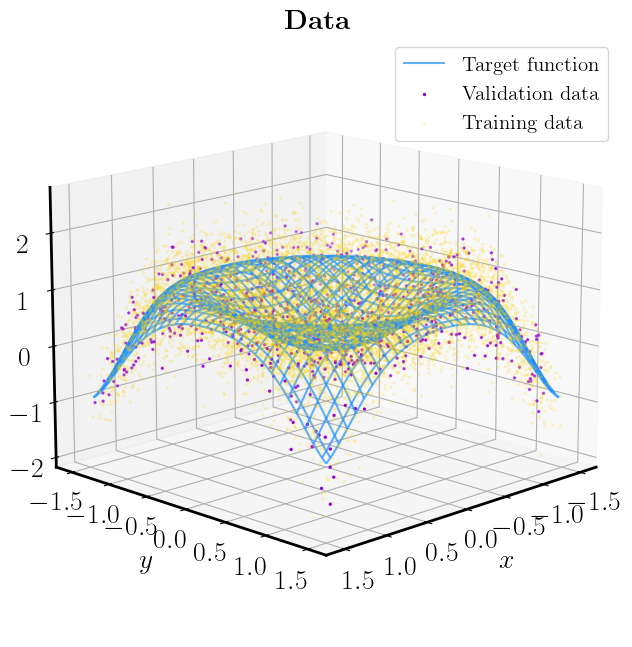

In [23]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-1.5, 1.5, 0.05)
y_surf = np.arange(-1.5, 1.5, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, sin2D(X_surf, Y_surf), color='dodgerblue', alpha=0.7, label = 'Target function')
ax.scatter(x_valid, y_valid, z_valid, s=2, color='darkviolet', label = 'Validation data')
ax.scatter(x_train, y_train, z_train, s=2, color='gold', alpha=0.15, label = 'Training data')
ax.set_xlabel('$x$', labelpad=10)
ax.set_ylabel('$y$', labelpad=10)
ax.set_zlabel('$z$')
plt.title(r'\textbf{Data}')

ax.legend(fontsize=15)
ax.view_init(15, 45)

plt.show()

With this plot I show the target function as well as the training and validation datasets.

In [24]:
# training hyperparams
epochs = 100
act = 'elu'

# model
NN_3_1 = tf.keras.Sequential()

NN_3_1.add(Dense(32, input_shape=(2,), activation=act))
NN_3_1.add(Dense(64, activation=act))
NN_3_1.add(Dense(1, activation=act))

NN_3_1.compile(optimizer='adam', loss='mse', metrics=['mse'])
NN_3_1.summary()

# training
history_3_1 = NN_3_1.fit(x=data_train, y=z_train, batch_size=32, epochs=epochs, shuffle=True, validation_data=(data_valid, z_valid))

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 32)                96        
                                                                 
 dense_128 (Dense)           (None, 64)                2112      
                                                                 
 dense_129 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 2s 3ms/step - loss: 0.3275 - mse: 0.3275 - val_loss: 0.2923 - val_mse: 0.2923
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3073 - mse: 0.3073 - val_loss: 0.2854 - val_mse: 0.2854
Epoch 3/100
313/313

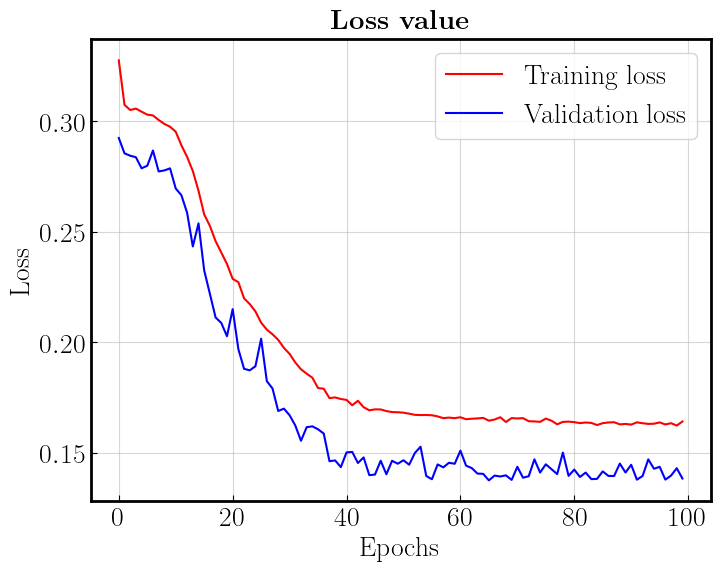

In [25]:
# plotting the loss
plt.plot(history_3_1.history['loss'], c='r', label='Training loss')
plt.plot(history_3_1.history['val_loss'], c='b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(r'\textbf{Loss value}', pad=8)
plt.legend()
plt.show()

This plot shows the evolution of the training and validation losses, the validation loss is less smooth but it takes lower values than the training one, so we can say that the NN has not overfitted the training dataset.

94/94 [==============================] - 0s 703us/step


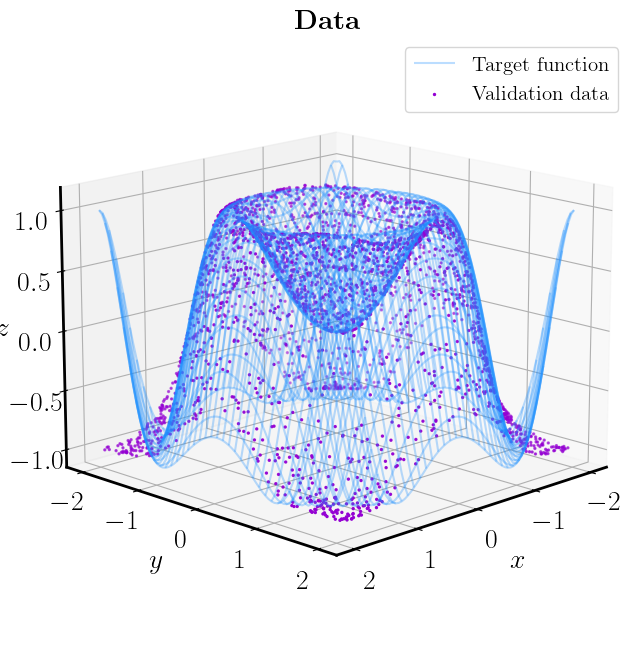

In [26]:
# plotting the prediction
n_pred = 3000
x_pred = np.random.uniform(-2,2,n_pred)
y_pred = np.random.uniform(-2,2,n_pred)
data_pred = np.column_stack((x_pred, y_pred))
z_pred = NN_3_1.predict(data_pred)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-2, 2, 0.05)
y_surf = np.arange(-2, 2, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, sin2D(X_surf, Y_surf), color='dodgerblue', alpha=0.3, label = 'Target function')
ax.scatter(x_pred, y_pred, z_pred, s=2, color='darkviolet', label = 'Validation data')
ax.set_xlabel('$x$', labelpad=10)
ax.set_ylabel('$y$', labelpad=10)
ax.set_zlabel('$z$')
plt.title(r'\textbf{Data}')

ax.legend(fontsize=15)
ax.view_init(15, 45)

plt.show()

Here we can say that the prediction of the neural network is good, it fails only outside the training domain.

#### Trying different activation functions for different layers

Hyperparameters:
- $N_{train \ data} = 10000$
- $N_{valid \ data} = 1000$
- $N_{hidden \ layers} = 3$
- $N_{neurons} = 64, \ 128, \ 64$
- $N_{epochs} = 200$
- $\sigma = 0.4$
- Activation function: 'elu', 'tanh'
- Batch size $= 32$
- Loss function: Mean Square Error
- Optimizer: Adam

Here I built a much more complex model.

In [27]:
# trying to combine different activaion functions
# training hyperparams
epochs = 200

# model
NN_3_2 = tf.keras.Sequential()

NN_3_2.add(Dense(32, input_shape=(2,), activation='elu'))
NN_3_2.add(Dense(64, activation='elu'))
NN_3_2.add(Dense(128, activation='tanh'))
NN_3_2.add(Dense(64, activation='tanh'))
NN_3_2.add(Dense(1, activation='elu'))

NN_3_2.compile(optimizer='adam', loss='mse', metrics=['mse'])
NN_3_2.summary()

# training
history_3_2 = NN_3_2.fit(x=data_train, y=z_train, batch_size=32, epochs=epochs, shuffle=True, validation_data=(data_valid, z_valid))


Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 32)                96        
                                                                 
 dense_131 (Dense)           (None, 64)                2112      
                                                                 
 dense_132 (Dense)           (None, 128)               8320      
                                                                 
 dense_133 (Dense)           (None, 64)                8256      
                                                                 
 dense_134 (Dense)           (None, 1)                 65        
                                                                 
Total params: 18849 (73.63 KB)
Trainable params: 18849 (73.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
313/3

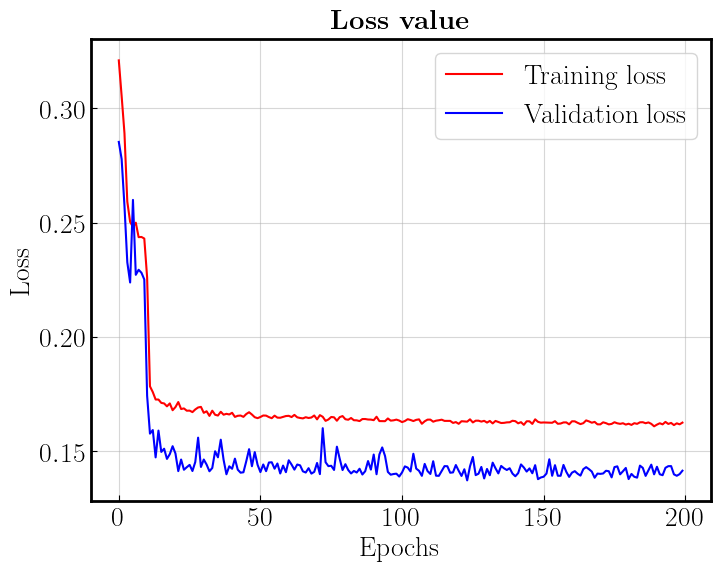

In [28]:
# plotting the loss
plt.plot(history_3_2.history['loss'], c='r', label='Training loss')
plt.plot(history_3_2.history['val_loss'], c='b', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(r'\textbf{Loss value}', pad=8)
plt.legend()
plt.show()

As we can see comparing this result with the previous one, here the loss decreases more quickly and after $100$ epochs seems stable, but the convergence value does not change significantly with respect to the simpler model.

94/94 [==============================] - 0s 1ms/step


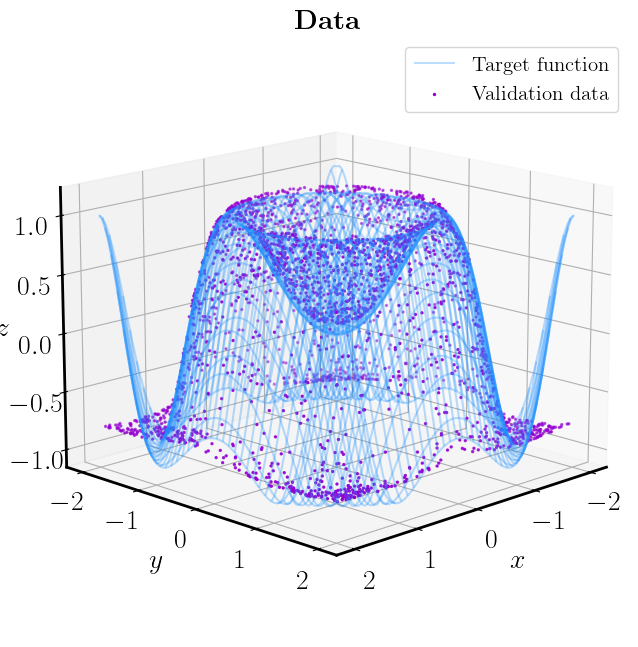

In [29]:
# plotting the prediction
n_pred = 3000
x_pred = np.random.uniform(-2,2,n_pred)
y_pred = np.random.uniform(-2,2,n_pred)
data_pred = np.column_stack((x_pred, y_pred))
z_pred = NN_3_2.predict(data_pred)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-2, 2, 0.05)
y_surf = np.arange(-2, 2, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, sin2D(X_surf, Y_surf), color='dodgerblue', alpha=0.3, label = 'Target function')
ax.scatter(x_pred, y_pred, z_pred, s=2, color='darkviolet', label = 'Validation data')
ax.set_xlabel('$x$', labelpad=10)
ax.set_ylabel('$y$', labelpad=10)
ax.set_zlabel('$z$')
plt.title(r'\textbf{Data}')

ax.legend(fontsize=15)
ax.view_init(15, 45)

plt.show()

With this model we are able to perform a good fit, though it always fails outside the training domain.

### Observations

In general I can say that the complexity of the model can give an improvement on the results of a fit, but increasing complexity isn't the only method to gain a better precision, one should also study the other hyperparameters, such as the activation functions that, as we have seen, have a great impact on the results.